<a href="https://colab.research.google.com/github/seohyun126/DeepLearning-TensorFlow/blob/main/1127_%ED%95%A9%EC%84%B1%EA%B3%B1%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 합성곱 신경망
- 데이터가 가진 특징들의 패턴을 학습하는 알고리즘
- 예를 들어 이미지 분류, 객체 탐지, 스타일 전이 등이 있음
- 객체 탐지란 이미지에서 특정한 객체를 인식하고 이미지의 어디에 있는지 위치까지 파악하는 기술로 인식한 객체가 어떤 클래스에 속하는지 분류 확률과 예측을 함께 알려줌
- 일반적으로 객체의 위치는 이미지의 좌표값으로 나타내기 때문에 경계 박스를 찾는 문제는 회귀분석으로 해결하고 클래스를 예측하는 문제는 분류문제가 됨
## 1-1 이미지 표현
- 이미지를 컴퓨터가 이해할 수 있게 하려면 숫자로 표현해야 함.
## 1-2 합성곱
- 합성곱 연산은 입력 이미지에 대해 일반적으로 정방형 크기를 가지는 kernel을 사용하여 입력 이미지에 대한 특성을 추출하는 방법을 말함. 합성곱 연산을 통해서 추출된 이미지를 feature map이라고 부름.
- 합성곱 신경망이 이미지 특성 추출에 효율적인 이유는 바로 커널의 shared weight 때문인데 오파 역전파 시 커널의 gradient을 계산할 때 9개에 대해서만 업데이트하면 되므로 완전 연결층을 사용할 때보다 연산량이 훨씬 적다는 장점이 있음
## 1-3 채널
- 채널은 입력 이미지를 구성하는 2차원 배열의 개수를 나타냄. 흑백이미지인 경우 채널의 개수가 1인 이미지이고 컬러 이미지의 경우 R,G,B로 3개의 채널을 가지는 이미지가 됨
- 컬러 이미지와 같이 입력 이미지가 여러개의 채널을 갖는 경우 합성곱 연산을 수행할 때 feature map의 생성과정을 잘 살펴봐야 함. 입력 이미지의 채널 개수만큼 커널이 생성되고, 각 채널마다 하나씩 커널은 적용하여 합성곱 여난은 수행함.
## 1-4 스트라이드
- 커널은 좌측 상단으로부터 입력 이미지를 기준으로 우측으로 이동하면서 합성곱 연산을 계속해서 수행하고 feature map에 결과를 채워나감. 이때 이동하는 간격을 stride 라고 정의하며 주로 1 또는 2로 설정함
## 1-5 패딩
- 추출된 feature map의 크기가 입력 이미지 대비 줄어들지 않도록 padding을 설정할 수 있음.
- 일반적으로 zero-padding을 사용하게 되며 입력 이미지의 가장 자리에 0으로 채워진 패딩값으로 채운 후 추출하게 됨
- 패딩을 적용한 후 합성곱 연산을 수행하게 되면 feature map의 크기가 줄어들지 않음
## 1-7 풀링
- pooling layer는 추출된 특성맵에 대해 다운 샘플링하여 이미지의 크기를 축소하는 레이어로 풀링 레이어를 사요항면서 얻을 수 있는 이점으로는 이미지 축소를 통해 연산량을 감소한다는 점과 overfitting 을 방지함에 있음
- pooling layer는 max pooling과 average pooling으로 나뉘는데 max pooling은 특징의 값이 큰 값이 다른 특징들을 대표한다는 개념으로 도입되었음. pooling layer도  stride를 가지며 stride를 2로 설정하면 2칸씩 건너뛰면서 풀링을 수행함
## 2 간단한 모델 생성

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


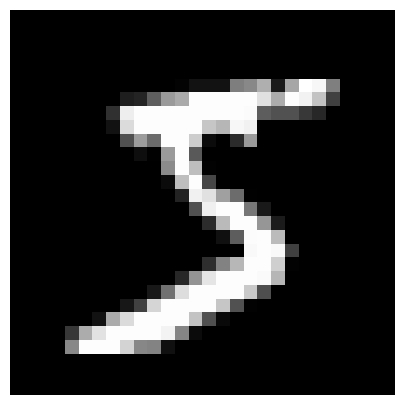

In [ ]:
# 2-1 데이터 로드 및 전처리
# tensorflow 모듈 import
import tensorflow as tf
# mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
# 샘플 이미지 출력
import matplotlib.pyplot as plt
def plot_image(data,idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx],cmap='gray')
  plt.axis('off')
  plt.show()
plot_image(x_train,0)

In [ ]:
# 훈련 셋과 이미지 픽셀을 나타내는 최솟값과 최댓값 출력
print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0 255
0 255


In [ ]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0
print(x_train.min(),x_train.max())
print(x_valid.min(),x_valid.max())

0.0 1.0
0.0 1.0


In [ ]:
# tf.newaxis 축을 텐서 배열에 직접 추가하는 방식
# 채널 추가
print(x_train.shape,x_valid.shape)
x_train_in=x_train[...,tf.newaxis]
x_valid_in=x_valid[...,tf.newaxis]
print(x_train_in.shape,x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# 2-2 Sequential API로 모델 생성 및 학습
# 합성곱 레이어 1개, 풀링 레이어 1개를 적용하는 간단한 모델 만들어보기
model=tf.keras.Sequential([
    # Convolution 적용 (32 filters)
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',
                           input_shape=(28,28,1),name='conv'),
    # Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2,2),name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델 훈련
history=model.fit(x_train_in,y_train,
                  validation_data=(x_valid_in,y_valid),
                  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2104 - accuracy: 0.9400 - val_loss: 0.0861 - val_accuracy: 0.9736
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0771 - accuracy: 0.9774 - val_loss: 0.0626 - val_accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0587 - accuracy: 0.9829 - val_loss: 0.0643 - val_accuracy: 0.9790
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0480 - accuracy: 0.9857 - val_loss: 0.0531 - val_accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0413 - accuracy: 0.9873 - val_loss: 0.0518 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0349 - accuracy: 0.9893 - val_loss: 0.0542 - val_accuracy: 0.9838
Epoch 7/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0585 -

In [ ]:
# 모델의 학습된 가중치를 사용하여 손실과 평가지표 계산하
model.evaluate(x_valid_in,y_valid)

313/313 [==============================] - 2s 7ms/step - loss: 0.0585 - accuracy: 0.9841


[0.058519795536994934, 0.9840999841690063]

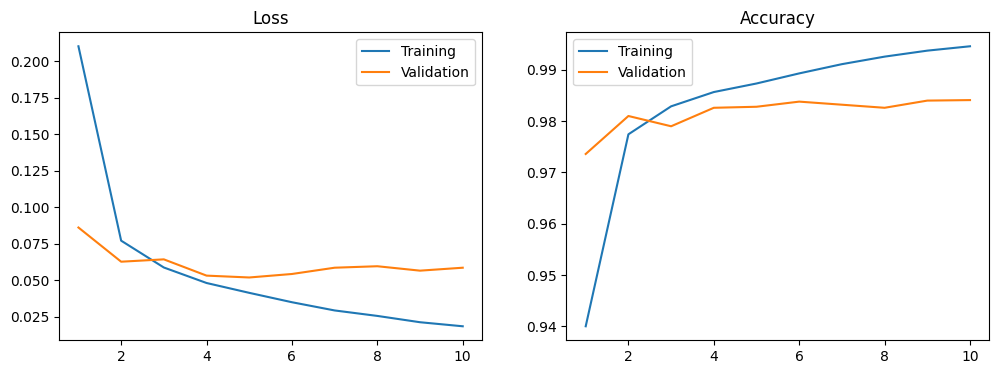

In [ ]:
# 4 epoch 이후부터는 모델이 과대적합으로 진행되었음을 확인 가능
def plot_loss_acc(history,epoch):
  loss,val_loss=history.history['loss'],history.history['val_loss']
  acc,val_acc=history.history['accuracy'],history.history['val_accuracy']
  fig,axes=plt.subplots(1,2,figsize=(12,4))
  axes[0].plot(range(1,epoch+1),loss,label='Training')
  axes[0].plot(range(1,epoch+1),val_loss,label='Validation')
  axes[0].legend(loc='best')
  axes[0].set_title('Loss')
  axes[1].plot(range(1,epoch+1),acc,label='Training')
  axes[1].plot(range(1,epoch+1),val_acc,label='Validation')
  axes[1].legend(loc='best')
  axes[1].set_title('Accuracy')
  plt.show()
plot_loss_acc(history,10)

In [ ]:
# 모델 구조 파악
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv (Conv2D)               (None, 26, 26, 32)        320       
                                                                 
 pool (MaxPooling2D)         (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 입력 텐서 형태
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 출력 텐서 형태
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>

In [ ]:
# 레이어
model.layers

In [ ]:
# 첫번째 레이어 선택
model.layers[0]

In [ ]:
# 첫번째 레이어 입력
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [ ]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [ ]:
# 각 레이어의 가중치 확인
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 1.18888922e-01, -2.40167290e-01, -6.83739364e-01,
           -1.39997518e+00,  3.13125610e-01,  3.49485457e-01,
            2.35275999e-01, -8.70702207e-01,  1.38264164e-01,
           -8.20193410e-01, -5.45771569e-02, -3.63141477e-01,
           -3.15985680e-01,  4.82824326e-01, -4.18497017e-03,
            2.23384559e-01, -1.02884138e+00,  5.32388091e-01,
            8.15603361e-02, -6.55693531e-01,  3.81521583e-02,
            4.34397399e-01, -3.97577137e-01, -3.18240225e-01,
           -2.91149914e-01, -5.67534804e-01,  1.90118626e-01,
           -4.51237224e-02, -1.10265994e+00,  5.04722238e-01,
           -1.13240533e-01,  2.72980213e-01]],
 
         [[ 4.72560644e-01,  2.11316749e-01, -4.98771816e-01,
           -7.21526921e-01, -5.46529219e-02,  2.95161992e-01,
            2.01351702e-01, -5.56087792e-01,  4.99807209e-01,
            8.54766667e-02,  2.59166449e-01, -6.96617186e-01,
           

In [ ]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 1.18888922e-01, -2.40167290e-01, -6.83739364e-01,
          -1.39997518e+00,  3.13125610e-01,  3.49485457e-01,
           2.35275999e-01, -8.70702207e-01,  1.38264164e-01,
          -8.20193410e-01, -5.45771569e-02, -3.63141477e-01,
          -3.15985680e-01,  4.82824326e-01, -4.18497017e-03,
           2.23384559e-01, -1.02884138e+00,  5.32388091e-01,
           8.15603361e-02, -6.55693531e-01,  3.81521583e-02,
           4.34397399e-01, -3.97577137e-01, -3.18240225e-01,
          -2.91149914e-01, -5.67534804e-01,  1.90118626e-01,
          -4.51237224e-02, -1.10265994e+00,  5.04722238e-01,
          -1.13240533e-01,  2.72980213e-01]],

        [[ 4.72560644e-01,  2.11316749e-01, -4.98771816e-01,
          -7.21526921e-01, -5.46529219e-02,  2.95161992e-01,
           2.01351702e-01, -5.56087792e-01,  4.99807209e-01,
           8.54766667e-02,  2.59166449e-01, -6.96617186e-01,
          -2.45026946e-01,  

In [ ]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<tf.Variable 'conv/bias:0' shape=(32,) dtype=float32, numpy=
array([-0.23515253, -0.18914618, -0.19335543, -0.01773884, -0.3379383 ,
       -0.4237464 , -0.26406783, -0.02409321, -0.03480106, -0.04653683,
       -0.16376878, -0.08598787, -0.01278198, -0.00935016, -0.02606257,
       -0.05569435, -0.07585488, -0.00663148, -0.26538137, -0.16817193,
       -0.1230725 , -0.4669306 , -0.05181693, -0.26634794, -0.1386188 ,
       -0.32692873, -0.17646642, -0.20989487,  0.23941238,  0.00668974,
       -0.01494232, -0.33360118], dtype=float32)>

In [ ]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

In [ ]:
# 모델에 입력 데이터를 넣어주고 모델의 첫번째와 두번째 레이어의 출력을 최종 출력으로 갖는
# activatior 모델을 정의
# 첫번째 샘플에 대하여 각 레이어의 출력을 예측
# 샘플 이미지의 레이어별 출력을 리스트에 추가(첫번째 레이어, 두번째 레이어)
activator=tf.keras.Model(inputs=model.input,outputs=[layer.output for layer in model.layers[:2]])
activations=activator.predict(x_train_in[0][tf.newaxis,...])
len(activations)

1/1 [==============================] - 0s 99ms/step


2

In [ ]:
# 첫번째 layer (conv) 출력층
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

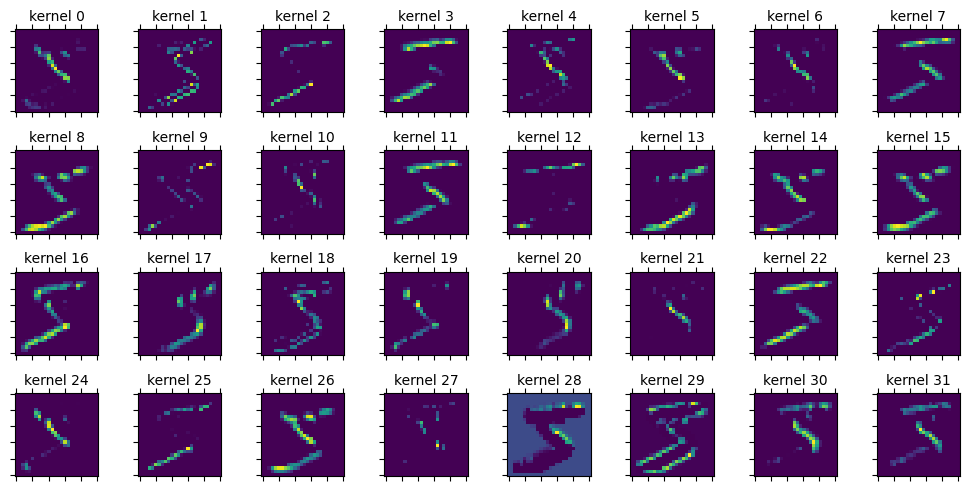

In [ ]:
# 첫번째 레이어에서 출력되는 feature map의 이미지를 32개 커널별로 구분하여 시각화하기
# Convolution 시각화
fig,axes=plt.subplots(4,8)
fig.set_size_inches(10,5)
for i in range(32):
  axes[i//8,i%8].matshow(conv_activation[0,:,:,i],cmap='viridis')
  axes[i//8,i%8].set_title('kernel %s'%str(i),fontsize=10)
  plt.setp(axes[i//8,i%8].get_xticklabels(),visible=False)
  plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)

plt.tight_layout()
plt.show()

In [ ]:
# 두번째 layer pool 출력층
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


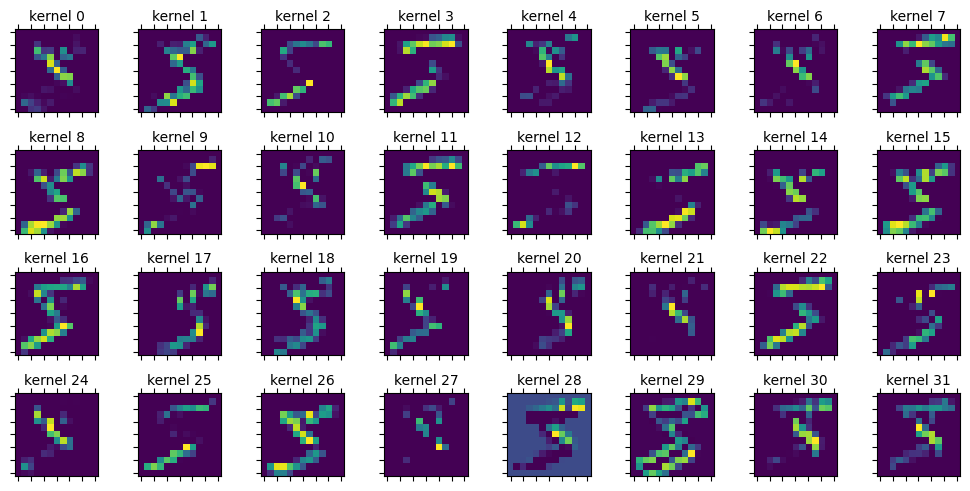

In [ ]:
# 시각화
fig,axes=plt.subplots(4,8)
fig.set_size_inches(10,5)
for i in range(32):
  axes[i//8,i%8].matshow(pooling_activation[0,:,:,i],cmap='viridis')
  axes[i//8,i%8].set_title('kernel %s'%str(i),fontsize=10)
  plt.setp(axes[i//8,i%8].get_xticklabels(),visible=False)
  plt.setp(axes[i//8,i%8].get_yticklabels(),visible=False)
plt.tight_layout()
plt.show()

In [ ]:
# 복잡한 모델 생성
import tensorflow as tf
import numpy as np
# mnist 손글씨 이미지 데이터 로드
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_valid,y_valid)=mnist.load_data()
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# 새로운 출력 값 배열 생성 (홀수 1, 짝수 0)
y_train_odd=[]
for y in y_train:
  if y%2==0:
    y_train_odd.append(0)
  else:
    y_train_odd.append(1)
y_train_odd=np.array(y_train_odd)
y_train_odd.shape

(60000,)

In [ ]:
print(y_train[:10])
print(y_train_odd[:10])

[5 0 4 1 9 2 1 3 1 4]
[1 0 0 1 1 0 1 1 1 0]


In [ ]:
# Validation 데이터셋 처리
y_valid_odd=[]
for y in y_valid:
  if y%2==0:
    y_valid_odd.append(0)
  else:
    y_valid_odd.append(1)
y_valid_odd=np.array(y_valid_odd)
y_valid_odd.shape

(10000,)

In [ ]:
# 정규화
x_train=x_train/255.0
x_valid=x_valid/255.0
# 채널 추가
x_train_in=tf.expand_dims(x_train,-1)
x_valid_in=tf.expand_dims(x_valid,-1)
print(x_train_in.shape,x_valid_in.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
# 3-2 Functional API로 다중 입력, 다중 출력 레이어 생성
inputs=tf.keras.layers.Input(shape=(28,28,1))
conv=tf.keras.layers.Conv2D(32,(3,3),activation='relu')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2))(conv)
flat=tf.keras.layers.Flatten()(pool)
flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat,flat_inputs])
outputs=tf.keras.layers.Dense(10,activation='softmax')(concat)
model=tf.keras.models.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 26, 26, 32)           320       ['input_4[0][0]']             
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)           0         ['conv2d_2[0][0]']            
 g2D)                                                                                             
                                                                                                  
 flatten_3 (Flatten)         (None, 5408)                 0         ['max_pooling2d_2[0][0]'

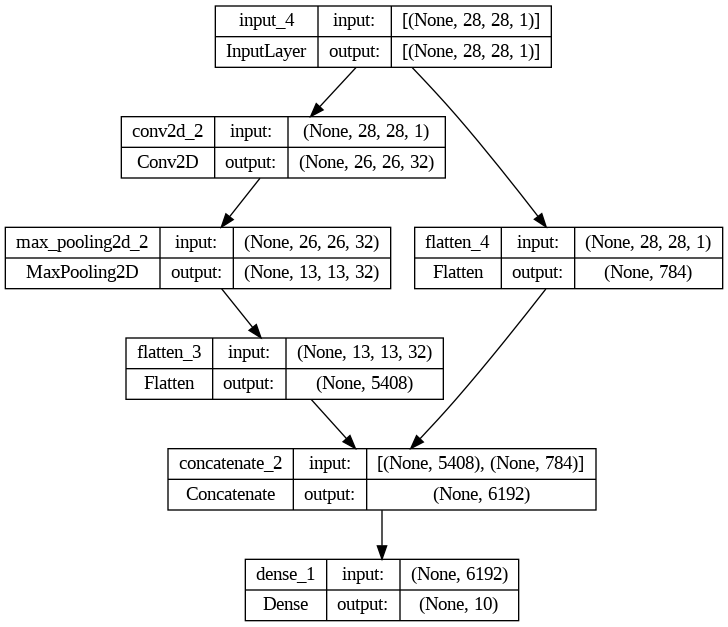

In [ ]:
# 모델 구조 출력 및 이미지 파일로 저장
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True,to_file='functional_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델 훈련
history=model.fit(x_train_in,y_train,validation_data=(x_valid_in,y_valid),
                  epochs=10)
# 모델 성능
val_loss,val_acc=model.evaluate(x_valid_in,y_valid)
print(val_loss,val_acc)

Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2172 - accuracy: 0.9380 - val_loss: 0.0904 - val_accuracy: 0.9736
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0840 - accuracy: 0.9757 - val_loss: 0.0651 - val_accuracy: 0.9791
Epoch 3/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0611 - accuracy: 0.9820 - val_loss: 0.0621 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0481 - accuracy: 0.9861 - val_loss: 0.0567 - val_accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0410 - accuracy: 0.9873 - val_loss: 0.0564 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0503 - val_accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0289 - accuracy: 0.9914 - val_loss: 0.0634 -

In [ ]:
# 다중 출력 분류 모델
# 두가지의 서로 다른 분류 무넺를 예측
# 숫자를 맞추는 분류 문제와 홀수 짝수를 맞추는 분류 문제를 동시에 풀어내는 모델을 정의하는 코드
# Functional API를 사용해 모델 생성
inputs=tf.keras.layers.Input(shape=(28,28,1),name='inputs')
conv=tf.keras.layers.Conv2D(32,(3,3),activation='relu',name='conv2d_layer')(inputs)
pool=tf.keras.layers.MaxPooling2D((2,2),name='maxpool_layer')(conv)
flat=tf.keras.layers.Flatten(name='flatten_layer')(pool)
flat_inputs=tf.keras.layers.Flatten()(inputs)
concat=tf.keras.layers.Concatenate()([flat,flat_inputs])
digit_outputs=tf.keras.layers.Dense(10,activation='softmax',name='digit_dense')(concat)
odd_outputs=tf.keras.layers.Dense(1,activation='sigmoid',name='odd_dense')(flat_inputs)
model=tf.keras.models.Model(inputs=inputs,outputs=[digit_outputs,odd_outputs])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_layer (Conv2D)       (None, 26, 26, 32)           320       ['inputs[0][0]']              
                                                                                                  
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)           0         ['conv2d_layer[0][0]']        
 D)                                                                                               
                                                                                                  
 flatten_layer (Flatten)     (None, 5408)                 0         ['maxpool_layer[0][0]'] 

In [ ]:
# 모델의 입력과 출력을 나타내는 텐서
print(model.input)
print(model.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='inputs'), name='inputs', description="created by layer 'inputs'")
[<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'digit_dense')>, <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'odd_dense')>]


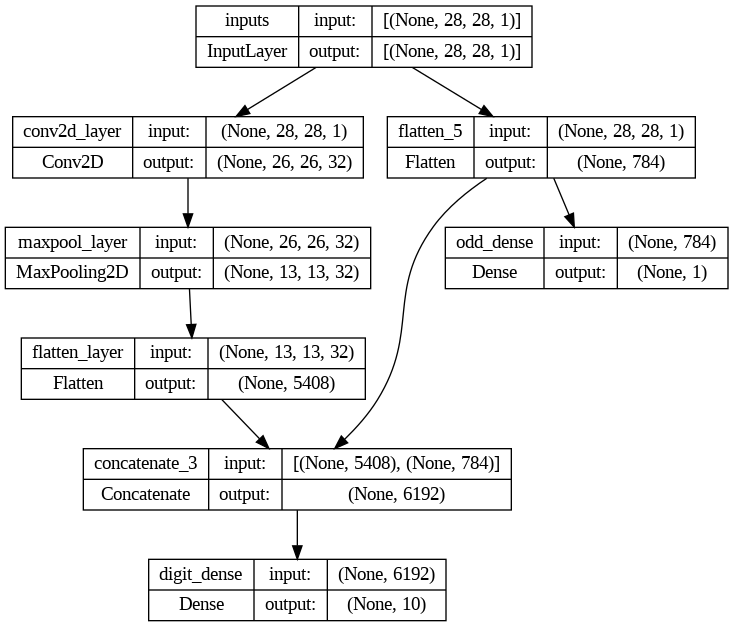

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True,to_file='multi_output_cnn.png')

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam',loss={'digit_dense':'sparse_categorical_crossentropy',
                                     'odd_dense':'binary_crossentropy'},
              loss_weights={'digit_dense':1,'odd_dense':0.5},
              metrics=['accuracy'])
# 모델 훈련
history=model.fit({'inputs':x_train_in},{'digit_dense':y_train,'odd_dense':y_train_odd},
                  validation_data=({'inputs':x_valid_in},{'digit_dense':y_valid,
                  'odd_dense':y_valid_odd}),epochs=10)


Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3563 - digit_dense_loss: 0.1942 - odd_dense_loss: 0.3243 - digit_dense_accuracy: 0.9447 - odd_dense_accuracy: 0.8640 - val_loss: 0.2153 - val_digit_dense_loss: 0.0770 - val_odd_dense_loss: 0.2766 - val_digit_dense_accuracy: 0.9768 - val_odd_dense_accuracy: 0.8895
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2104 - digit_dense_loss: 0.0746 - odd_dense_loss: 0.2715 - digit_dense_accuracy: 0.9783 - odd_dense_accuracy: 0.8910 - val_loss: 0.2012 - val_digit_dense_loss: 0.0698 - val_odd_dense_loss: 0.2629 - val_digit_dense_accuracy: 0.9784 - val_odd_dense_accuracy: 0.8954
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1881 - digit_dense_loss: 0.0567 - odd_dense_loss: 0.2627 - digit_dense_accuracy: 0.9830 - odd_dense_accuracy: 0.8960 - val_loss: 0.1826 - val_digit_dense_loss: 0.0529 - val_odd_dense_loss: 0.2594 - val_digit_dense_accuracy: 0.9819 -

In [ ]:
# 모델 성능
model.evaluate({'inputs':x_valid_in},{'digit_dense':y_valid,'odd_dense':y_valid_odd})

313/313 [==============================] - 3s 11ms/step - loss: 0.1901 - digit_dense_loss: 0.0624 - odd_dense_loss: 0.2554 - digit_dense_accuracy: 0.9834 - odd_dense_accuracy: 0.9016


[0.19013194739818573,
 0.06241165101528168,
 0.2554405629634857,
 0.9833999872207642,
 0.9016000032424927]

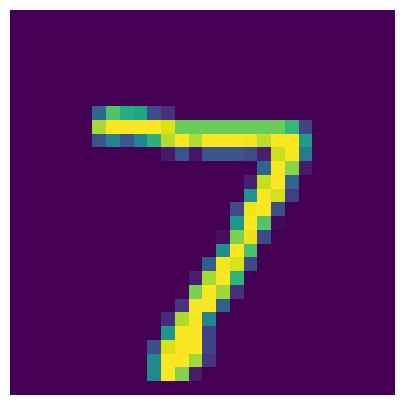

In [ ]:
# 샘플 이미지 출력
def plot_image(data,idx):
  plt.figure(figsize=(5,5))
  plt.imshow(data[idx])
  plt.axis('off')
  plt.show()
plot_image(x_valid,0)

In [ ]:
digit_preds,odd_preds=model.predict(x_valid_in)
print(digit_preds[0])
print(odd_preds[0])

313/313 [==============================] - 4s 11ms/step
[3.6108755e-12 1.2848608e-11 6.6652428e-10 1.2238711e-07 4.6282297e-12
 6.5966330e-13 1.4650348e-20 9.9999982e-01 1.5260618e-09 2.3739073e-09]
[0.99957234]


In [ ]:
digit_labels=np.argmax(digit_preds,axis=1)
digit_labels[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [ ]:
odd_labels=(odd_preds>0.5).astype(np.int).reshape(1,-1)[0]
odd_labels[0:10]

<ipython-input-55-6622c6c484c3>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  odd_labels=(odd_preds>0.5).astype(np.int).reshape(1,-1)[0]


array([1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [ ]:
# 3-4 전이 학습
# 앞의 모델에서 flatten_layer로 출력을 추출
base_model_output=model.get_layer('flatten_layer').output
# 앞의 출력을 출력으로 하는 모델 정의
base_model=tf.keras.models.Model(inputs=model.input,outputs=base_model_output,name='base')
base_model.summary()

Model: "base"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


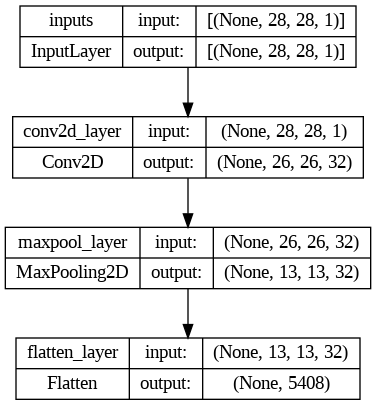

In [ ]:
plot_model(base_model,show_shapes=True,show_layer_names=True,to_file='base_model.png')

In [ ]:
# Sequential API 적용
digit_model=tf.keras.Sequential([base_model,tf.keras.layers.Dense(10,activation='softmax'),])
digit_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base (Functional)           (None, 5408)              320       
                                                                 
 dense_2 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


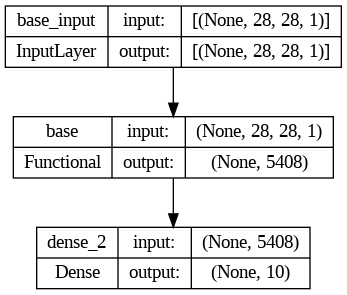

In [ ]:
plot_model(digit_model,show_shapes=True,show_layer_names=True,to_file='digit_model.png')

In [ ]:
# 모델 컴파일
digit_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델 훈련
history=digit_model.fit(x_train_in,y_train,validation_data=(x_valid_in,y_valid),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1266 - accuracy: 0.9647 - val_loss: 0.0601 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0577 - accuracy: 0.9822 - val_loss: 0.0572 - val_accuracy: 0.9811
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0441 - accuracy: 0.9862 - val_loss: 0.0490 - val_accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0353 - accuracy: 0.9890 - val_loss: 0.0490 - val_accuracy: 0.9842
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0286 - accuracy: 0.9913 - val_loss: 0.0745 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0238 - accuracy: 0.9925 - val_loss: 0.0529 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0678 -

In [ ]:
# trainable=False로 설정하면 모델의 파라미터가 고정되어 훈련을 통해서 업데이트되지 않음
# base model의 가중치 고정하기
base_model_frozen=tf.keras.models.Model(inputs=model.input,outputs=base_model.output,name='base_frozen')
base_model_frozen.trainable=False
base_model_frozen.summary()

Model: "base_frozen"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [ ]:
# Functional API 적용하기
dense_output=tf.keras.layers.Dense(10,activation='softmax')(base_model_frozen.output)
digit_model_frozen=tf.keras.models.Model(inputs=base_model_frozen.input,outputs=dense_output)
digit_model_frozen.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [ ]:
# 모델 컴파일
digit_model_frozen.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델 훈련
history=digit_model_frozen.fit(x_train_in,y_train,validation_data=(x_valid_in,y_valid),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1133 - accuracy: 0.9703 - val_loss: 0.0560 - val_accuracy: 0.9809
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0489 - accuracy: 0.9853 - val_loss: 0.0529 - val_accuracy: 0.9818
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0367 - accuracy: 0.9885 - val_loss: 0.0482 - val_accuracy: 0.9843
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.0564 - val_accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0533 - val_accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0178 - accuracy: 0.9943 - val_loss: 0.0509 - val_accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0542 -

In [ ]:
# 베이스 모델의 Conv2D 레이어의 가중치만 고정
base_model_frozen2=tf.keras.models.Model(inputs=model.input,outputs=base_model_output,name='base_model_frozen2')
base_model_frozen2.get_layer('conv2d_layer').trainable=False
base_model_frozen2.summary()

Model: "base_model_frozen2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 320 (1.25 KB)
_________________________________________________________________


In [ ]:
# Functional API 적용
dense_output2=tf.keras.layers.Dense(10,activation='softmax')(base_model_frozen2.output)
digit_model_frozen2=tf.keras.models.Model(inputs=base_model_frozen2.input,
                                          outputs=dense_output2)
digit_model_frozen2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_layer (Conv2D)       (None, 26, 26, 32)        320       
                                                                 
 maxpool_layer (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten_layer (Flatten)     (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54090 (211.29 KB)
Non-trainable params: 320 (1.25 KB)
_____________________

In [ ]:
# 모델 컴파일
digit_model_frozen2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 모델 훈련
history=digit_model_frozen2.fit(x_train_in,y_train,validation_data=(x_valid_in,y_valid),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 16ms/step - loss: 0.1144 - accuracy: 0.9685 - val_loss: 0.0566 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0487 - accuracy: 0.9860 - val_loss: 0.0502 - val_accuracy: 0.9836
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.0555 - val_accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0273 - accuracy: 0.9916 - val_loss: 0.0516 - val_accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.0541 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0576 - val_accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0154 - accuracy: 0.9952 - val_loss: 0.0562 - val_